
<a href="https://colab.research.google.com/github/takzen/ai-engineering-handbook/blob/main/notebooks/010_Decision_Trees.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



<a href="https://colab.research.google.com/github/takzen/ai-engineering-handbook/blob/main/10_Decision_Trees.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 🌳 Drzewa Decyzyjne (Decision Trees)

Większość algorytmów ML to "Czarne Skrzynki" (Black Box). Wrzucasz dane, wychodzi wynik, ale nie wiesz DLACZEGO.
**Drzewo Decyzyjne** jest "Białą Skrzynką". Możesz je narysować i prześledzić każdą decyzję palcem.

**Jak to działa?**
Algorytm szuka "Najlepszego Pytania", które podzieli dane na dwie jak najbardziej różne grupy.
*   Pytanie 1: "Czy to zwierzę jest większe od psa?"
    *   TAK -> (Idziemy w prawo: Konie, Słonie...)
    *   NIE -> (Idziemy w lewo: Koty, Myszy...)

Będziemy klasyfikować słynne kwiaty **Iris** (Irysy). Mamy 3 gatunki i wymiary ich płatków.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 1. ŁADUJEMY DANE (Irysy)
# To najsłynniejszy zbiór danych w historii ML.
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Zobaczmy przykładowe dane
df = pd.DataFrame(X, columns=feature_names)
df['Gatunek'] = [class_names[i] for i in y]

print("--- TAK WYGLĄDAJĄ DANE ---")
print("Mamy wymiary płatków (Petal) i działek kielicha (Sepal).")
display(df.sample(5)) # Pokaż 5 losowych wierszy

--- TAK WYGLĄDAJĄ DANE ---
Mamy wymiary płatków (Petal) i działek kielicha (Sepal).


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Gatunek
145,6.7,3.0,5.2,2.3,virginica
126,6.2,2.8,4.8,1.8,virginica
6,4.6,3.4,1.4,0.3,setosa
76,6.8,2.8,4.8,1.4,versicolor
14,5.8,4.0,1.2,0.2,setosa


## Budujemy Drzewo

Użyjemy `DecisionTreeClassifier`.
Ustawimy parametr `max_depth=3`.
Dlaczego? Bo jeśli pozwolimy drzewu rosnąć w nieskończoność, stanie się gigantycznym krzakiem, którego nie rozczytamy (i wpadniemy w Overfitting!). Ograniczenie głębokości zmusza je do zadawania tylko najważniejszych pytań.

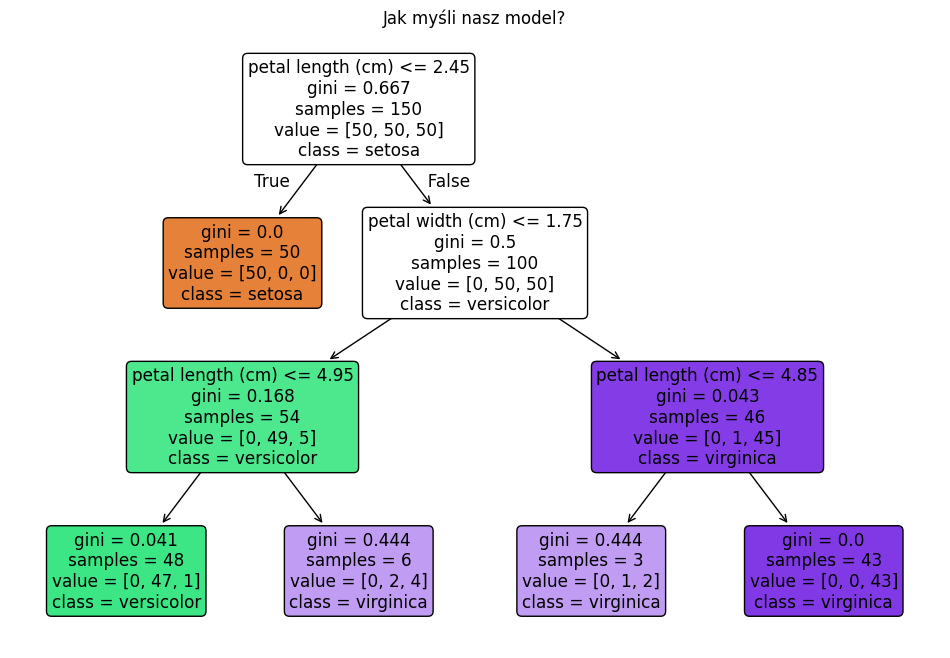

In [2]:
# 1. Trenujemy model
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X, y)

# 2. RYSUJEMY DRZEWO (Magia!)
plt.figure(figsize=(12, 8))
plot_tree(model, 
          feature_names=feature_names,  
          class_names=class_names,
          filled=True, # Kolory oznaczają gatunki
          rounded=True)
plt.title("Jak myśli nasz model?")
plt.show()

## Jak to czytać?

Spójrz na obrazek powyżej.

1.  **Korzeń (Na samej górze):**
    *   Pytanie: `petal length (cm) <= 2.45`?
    *   To jest najważniejsze pytanie w całym zestawie danych!
    *   Jeśli **TAK** (idziemy w lewo) -> Trafiamy do pomarańczowego pudełka `class = setosa`.
    *   Zauważ `gini = 0.0`. To znaczy, że **zagadka rozwiązana**. Wszystkie kwiaty tutaj to Setosa. Model jest w 100% pewny.

2.  **Gałęzie:**
    *   Jeśli **NIE** (idziemy w prawo) -> Model musi pytać dalej.
    *   Kolejne pytanie: `petal width (cm) <= 1.75`?

**Wniosek:**
Model odkrył, że **Długość Płatka (Petal Length)** to kluczowa cecha. Inne cechy (jak Sepal Width) mogą być w ogóle nieistotne!

--- CO JEST WAŻNE DLA DRZEWA? ---


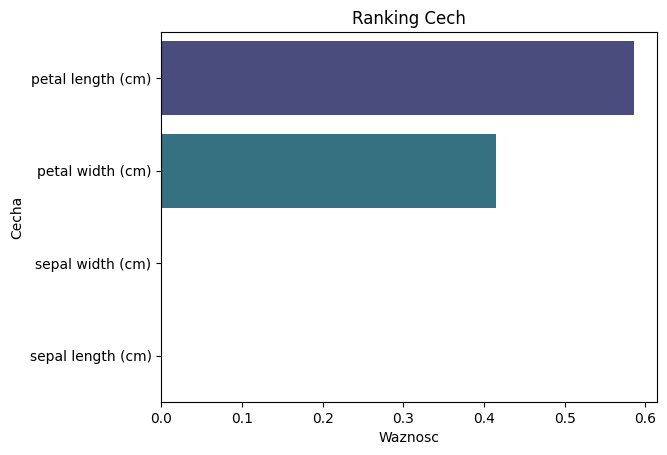

In [4]:
# Sprawdźmy to matematycznie - Feature Importance
import seaborn as sns

waznosc_cech = pd.DataFrame({
    'Cecha': feature_names,
    'Waznosc': model.feature_importances_
}).sort_values('Waznosc', ascending=False)

print("--- CO JEST WAŻNE DLA DRZEWA? ---")
# POPRAWKA: Dodaliśmy hue='Cecha' i legend=False
sns.barplot(x='Waznosc', y='Cecha', data=waznosc_cech, hue='Cecha', legend=False, palette='viridis')

plt.title("Ranking Cech")
plt.show()

## 🧠 Podsumowanie: Siła prostoty i jej słabość

Dlaczego nie używamy samych Drzew, skoro są tak genialnie proste i czytelne?

**Tu jest haczyk.**
Pojedyncze drzewo jest bardzo **niestabilne**.
Wystarczy, że zmienisz jeden mały szczegół w danych treningowych, a cała struktura drzewa może się wywrócić do góry nogami (zmienią się pytania). Drzewa mają też tendencję do "wkuwania na pamięć" (Overfitting), jeśli nie ograniczymy ich głębokości.

**Rozwiązanie? Las.**
W nowoczesnym ML rzadko sadzimy jedno drzewo. Sadzimy ich 100 albo 1000.
Każde drzewo uczy się na trochę innym fragmencie danych. Potem robimy głosowanie.
Tak powstaje **Random Forest (Las Losowy)** – jeden z najpotężniejszych algorytmów świata, którego "ojcem" jest właśnie to proste drzewko.